In [ ]:
# ================================================================
# 📘 USE CASE 5: WEB ANALYTICS & RECOMMENDATION INSIGHTS
# Industry: Media & Entertainment
# Project: Viewer Churn Prediction for OTT Platforms
# Platform: Jupyter Notebook
# ================================================================

In [1]:


# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import sqlite3
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
# ==============================
# STEP 2: Load Data from Database
# ==============================
db_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment.db"
conn = sqlite3.connect(db_path)

df_churn = pd.read_sql_query("SELECT * FROM churn_prediction_results", conn)
conn.close()

print("✅ Data Loaded from Database Successfully")
print("Rows:", len(df_churn))
df_churn.head()

✅ Data Loaded from Database Successfully
Rows: 6000


,app_name,reviewId,userName,content,score,at,clean_text,polarity,subjectivity,sentiment,watch_hours,sessions_per_week,subscription_age_months,sentiment_score,churn,predicted_churn_log,predicted_churn_rf
0,Netflix,cb4e0746-f12b-482c-9440-8f0e6417e240,Sa'adatu Bashir,Am sure Netflix is a very good app,5,03-11-2025 10:32,sure netflix good app,0.6,0.744444,Positive,2,4,2,0.6,1,1,1
1,Netflix,d4b951db-3286-41a6-bd2c-7ee50abb2478,Entle Sonjica,great no ads,5,03-11-2025 10:19,great ad,0.8,0.750000,Positive,8,7,21,0.8,1,0,0
2,Netflix,6dca3694-f14d-4475-b8a9-6aeb8be22ae0,Dim Sum,"Nothing worth watching,waste of money",1,03-11-2025 10:03,nothing worth watchingwaste money,0.3,0.100000,Positive,16,6,16,0.3,0,1,0
3,Netflix,f6b1d27e-d127-40ef-9687-135baf75f3db,GUPS DABALI,best,5,03-11-2025 09:46,best,1.0,0.300000,Positive,21,1,15,1.0,0,0,0
4,Netflix,f27a1437-f6e2-4bcc-a6b9-4832cc7dea4b,genaro carden,love it,5,03-11-2025 09:42,love,0.5,0.600000,Positive,22,3,21,0.5,0,1,0


In [5]:
# ==============================
# STEP 3: Simulate Web Activity Data (if not available)
# ==============================
import random

if 'avg_watch_time' not in df_churn.columns:
    np.random.seed(42)
    df_churn['avg_watch_time'] = np.random.randint(30, 180, df_churn.shape[0])  # in minutes
    df_churn['device_type'] = np.random.choice(['Mobile', 'Smart TV', 'Laptop', 'Tablet'], df_churn.shape[0])
    df_churn['fav_genre'] = np.random.choice(['Action', 'Drama', 'Comedy', 'Horror', 'Romance', 'Documentary'], df_churn.shape[0])
    df_churn['num_clicks'] = np.random.randint(10, 300, df_churn.shape[0])
    df_churn['time_on_app'] = np.random.randint(5, 120, df_churn.shape[0])
    df_churn['buffering_issues'] = np.random.randint(0, 10, df_churn.shape[0])
    print("🧩 Simulated web activity data added.")

🧩 Simulated web activity data added.


In [7]:
# ==============================
# STEP 4: Encode and Normalize
# ==============================
# Convert categorical data to numeric
df_encoded = pd.get_dummies(df_churn[['device_type', 'fav_genre']], drop_first=True)

# Combine numeric features
features = ['avg_watch_time', 'num_clicks', 'time_on_app', 'buffering_issues']
df_numeric = pd.concat([df_churn[features], df_encoded], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

print("✅ Feature Scaling Completed")
print("Feature matrix shape:", X_scaled.shape)

✅ Feature Scaling Completed
Feature matrix shape: (6000, 12)


In [9]:
# ==============================
# STEP 5: Clustering (K-Means)
# ==============================
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_churn['Cluster'] = kmeans.fit_predict(X_scaled)

print("✅ Clustering Completed")
print("Cluster Counts:\n", df_churn['Cluster'].value_counts())

✅ Clustering Completed
Cluster Counts:
 Cluster
1    2912
0    1038
2    1034
3    1016
Name: count, dtype: int64


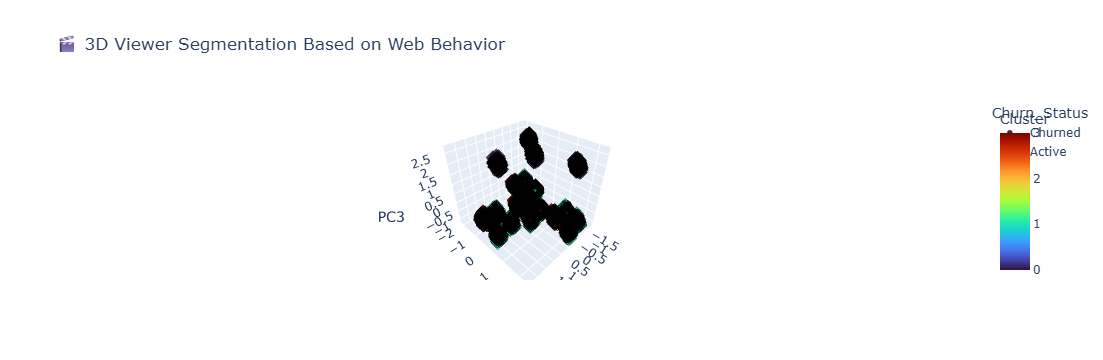

⚠️ PNG save failed (install kaleido): 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido

✅ Interactive HTML saved:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC5_WebBehavior_Clusters_3D.html


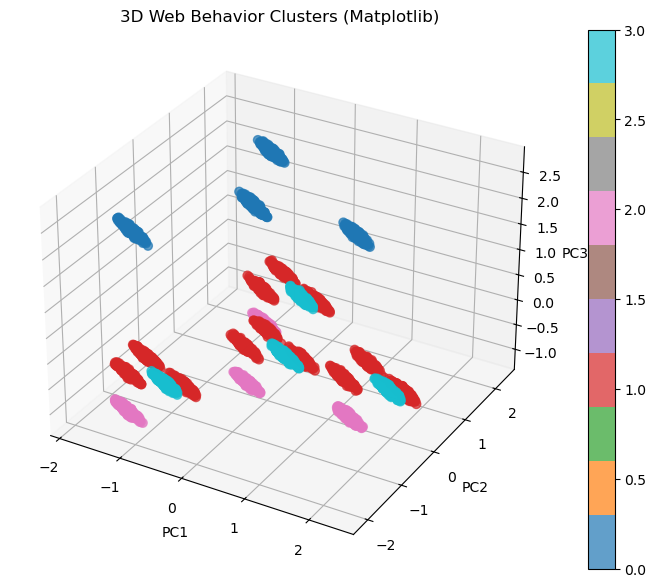


💾 Matplotlib plot saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC5_WebBehavior_Clusters_Matplotlib.png


In [19]:
# ==============================
# STEP 6: Dimensionality Reduction (PCA for 3D Visualization) + AUTO SAVE TO OUTPUT LOCATION
# ==============================
import os

# Perform PCA for 3D visualization
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X_scaled)
df_vis = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])
df_vis['Cluster'] = df_churn['Cluster']

# Ensure churn info is available
if 'churn' in df_churn.columns:
    df_vis['Churn_Status'] = df_churn['churn'].map({0: 'Active', 1: 'Churned'})
else:
    df_vis['Churn_Status'] = np.random.choice(['Active','Churned'], len(df_churn))

# ✅ Use your previous output folder (same as other outputs)
save_folder = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset"
os.makedirs(save_folder, exist_ok=True)

# ==============================
# --- 3D Visualization (Plotly Interactive) ---
# ==============================
fig = px.scatter_3d(
    df_vis,
    x='PC1', y='PC2', z='PC3',
    color='Cluster',
    symbol='Churn_Status',
    title='🎬 3D Viewer Segmentation Based on Web Behavior',
    color_continuous_scale='Turbo',
    opacity=0.8
)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='black')))

# Display interactive chart
fig.show()

# 🔽 Save Plotly chart to same folder
html_path = os.path.join(save_folder, "UC5_WebBehavior_Clusters_3D.html")
png_path = os.path.join(save_folder, "UC5_WebBehavior_Clusters_3D.png")

# Save as HTML (interactive)
fig.write_html(html_path)

# Save as PNG (requires kaleido)
try:
    fig.write_image(png_path)
    print(f"✅ Plotly charts saved successfully:\n{html_path}\n{png_path}")
except Exception as e:
    print(f"⚠️ PNG save failed (install kaleido): {e}")
    print(f"✅ Interactive HTML saved:\n{html_path}")

# ==============================
# --- 3D Visualization (Matplotlib Static) ---
# ==============================
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(111, projection='3d')
sc = ax.scatter(df_vis['PC1'], df_vis['PC2'], df_vis['PC3'],
                c=df_vis['Cluster'], cmap='tab10', s=40, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Web Behavior Clusters (Matplotlib)')
plt.colorbar(sc)

# 🔽 Save Matplotlib plot to same folder
matplotlib_path = os.path.join(save_folder, "UC5_WebBehavior_Clusters_Matplotlib.png")
plt.savefig(matplotlib_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"\n💾 Matplotlib plot saved to:\n{matplotlib_path}")


In [13]:
# ==============================
# STEP 7: Save Results to DB and CSV
# ==============================
conn = sqlite3.connect(db_path)
df_churn.to_sql('web_analytics_results', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

output_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_web_analytics.csv"
df_churn.to_csv(output_path, index=False)
print(f"💾 Results saved to database and CSV:\n{output_path}")

💾 Results saved to database and CSV:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_web_analytics.csv


In [17]:
# ==============================
# STEP 8: Insights & Recommendations (FIXED)
# ==============================
print("\n📊 Web Analytics Cluster Insights:")

cluster_summary = df_churn.groupby('Cluster').agg({
    'avg_watch_time':'mean',
    'time_on_app':'mean',
    'num_clicks':'mean',
    'buffering_issues':'mean'
}).round(2)

print(cluster_summary)

# Interpret each cluster
print("\n🧠 Recommendations Based on Clusters:")
for c in cluster_summary.index:
    avg_time = cluster_summary.loc[c, 'avg_watch_time']
    buff = cluster_summary.loc[c, 'buffering_issues']
    print(f"\nCluster {c}: avg_watch_time={avg_time}, buffering_issues={buff}")
    # Decision rules (clear, non-overlapping)
    if (avg_time > 120) and (buff < 3):
        print("👉 Highly engaged users — recommend exclusive premium content & loyalty offers.")
    elif (avg_time < 60) and (buff > 6):
        print("⚠️ Low engagement with performance issues — optimize streaming quality & reduce buffering.")
    elif (60 <= avg_time <= 120) and (buff <= 4):
        print("🙂 Moderate engagement — introduce personalized watchlists or mid-tier subscription plans.")
    else:
        print("💤 Dormant or casual users — run re-engagement campaigns and targeted offers.")



📊 Web Analytics Cluster Insights:
         avg_watch_time  time_on_app  num_clicks  buffering_issues
Cluster                                                           
0                104.00        60.64      151.24              4.66
1                105.96        61.09      153.93              4.49
2                104.54        62.50      151.53              4.71
3                105.59        63.30      152.05              4.58

🧠 Recommendations Based on Clusters:

Cluster 0: avg_watch_time=104.0, buffering_issues=4.66
💤 Dormant or casual users — run re-engagement campaigns and targeted offers.

Cluster 1: avg_watch_time=105.96, buffering_issues=4.49
💤 Dormant or casual users — run re-engagement campaigns and targeted offers.

Cluster 2: avg_watch_time=104.54, buffering_issues=4.71
💤 Dormant or casual users — run re-engagement campaigns and targeted offers.

Cluster 3: avg_watch_time=105.59, buffering_issues=4.58
💤 Dormant or casual users — run re-engagement campaigns and targete